# Example 1 - Visualizing a Corpus
This example is based on the "t-SNE Corpus Visualization" example from YellowBricks.

In particular their tSNE-based visualizer transform high dimensional data into a 2D structure. For very high dimensionality data you can apply a SVD (Single Value Decomposition) or PCA (Principle Component Analysis) first (50 components by default) then perform the t-SNE reduction.

In this example we are representing documents as vectors using tf-idf scores on text with no prior decomposition.

In [1]:
import os
import pandas as pd
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets.base import Bunch

### Defining some utility function to read a corpus
A corpus is defined as a set of text document and they are usually contained into a folder structure that also specify their type or genre. In this case, each document is contained within a folder with a label representing their type (book, cinema, cooking, gaming, sports).

data/hobbies<br/>
├── README.md<br/>
└── books<br/>
|   ├── 56d62a53c1808113ffb87f1f.txt<br/>
|   └── 5745a9c7c180810be6efd70b.txt<br/>
└── cinema<br/>
|   ├── 56d629b5c1808113ffb87d8f.txt<br/>
|   └── 57408e5fc180810be6e574c8.txt<br/>
└── cooking<br/>
|   ├── 56d62b25c1808113ffb8813b.txt<br/>
|   └── 573f0728c180810be6e2575c.txt<br/>
└── gaming<br/>
|   ├── 56d62654c1808113ffb87938.txt<br/>
|   └── 574585d7c180810be6ef7ffc.txt<br/>
└── sports<br/>
    ├── 56d62adec1808113ffb88054.txt<br/>
    └── 56d70f17c180810560aec345.txt<br/>

In [2]:
files  = [] # holds the file names relative to the root
data   = [] # holds the text read from the file
target = [] # holds the string of the category

def load_corpus(path):
    """
    Loads and wrangles the passed in text corpus by path.
    """

    # Check if the data exists, otherwise download or raise
    if not os.path.exists(path):
        raise ValueError((
            "'{}' dataset has not been downloaded, "
            "use the yellowbrick.download module to fetch datasets"
        ).format(path))

    # Read the directories in the directory as the categories.
    categories = [
        cat for cat in os.listdir(path)
        if os.path.isdir(os.path.join(path, cat))
    ]

    # Load the data from the files in the corpus
    for cat in categories:
        for name in os.listdir(os.path.join(path, cat)):
            files.append(os.path.join(path, cat, name))
            target.append(cat)

            with open(os.path.join(path, cat, name), 'r',encoding="utf-8") as f:
                data.append(f.read())


    # Return the data bunch for use similar to the newsgroups example
    return Bunch(
        categories=categories,
        files=files,
        data=data,
        target=target,
    )

### Each document is represented using tf-Idf scores
Each document is represented as a matrix or a word (the associated index really) and the tf-idf score.

In [3]:
path = "../Datasets/data/hobbies"

corpus = load_corpus(path)
tfidf  = TfidfVectorizer()

docs   = tfidf.fit_transform(corpus.data)
labels = corpus.target

In [4]:
print (corpus.categories)
print (docs.shape)
print (len(labels))

['books', 'cinema', 'cooking', 'gaming', 'sports']
(448, 20140)
448


In [5]:
print (docs[0])

  (0, 7385)	0.03915428432
  (0, 18292)	0.14228148
  (0, 12668)	0.221311473819
  (0, 19386)	0.101296233633
  (0, 3022)	0.0157017837223
  (0, 7688)	0.0370957322859
  (0, 6209)	0.0254569527584
  (0, 12444)	0.0502496051205
  (0, 2487)	0.208603946495
  (0, 773)	0.22141699184
  (0, 12313)	0.04523295947
  (0, 9474)	0.0111970331392
  (0, 18133)	0.0632772271891
  (0, 18556)	0.0442622947638
  (0, 11745)	0.0148690940005
  (0, 12410)	0.0405268283267
  (0, 18056)	0.0193752109094
  (0, 9036)	0.141013861804
  (0, 18068)	0.165221076144
  (0, 2199)	0.28342918097
  (0, 755)	0.251071121357
  (0, 1226)	0.0694125364044
  (0, 757)	0.298078226981
  (0, 3204)	0.0475482674786
  (0, 20028)	0.0327208478454
  :	:
  (0, 14460)	0.0979368518143
  (0, 7875)	0.15194435045
  (0, 12590)	0.04523295947
  (0, 15939)	0.0329879040456
  (0, 2040)	0.0129277645881
  (0, 19546)	0.0197538721726
  (0, 234)	0.0489684259071
  (0, 15881)	0.0425826038544
  (0, 13171)	0.0475482674786
  (0, 430)	0.059089714397
  (0, 13941)	0.04426229476

In [6]:
#Printing the feature id
print(tfidf.vocabulary_.get("home"))

# From the feature id we get the feature name
print (tfidf.get_feature_names()[tfidf.vocabulary_.get("home")])

# Same, but we specific directly the id
print (tfidf.get_feature_names()[12668])


8650
home
oscar


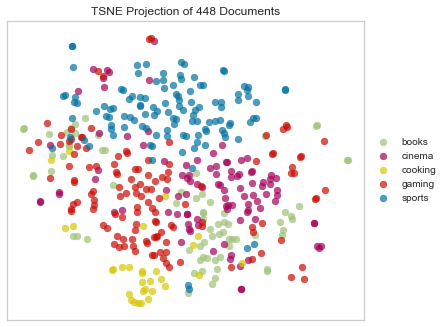

In [7]:
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(docs, labels)
tsne.poof()

You can see here, that each category of documents has text with very specific structures with little overlap.
Here the parameter to the TSNEVisualizer object:

<b>ax</b>: matplotlib axes. The axes to plot the figure on.

<b>decompose</b>: string or None.
A preliminary decomposition is often used prior to TSNE to make the projection faster. Specify “svd” for sparse data or “pca” for dense data. If decompose is None, the original data set will be used.

<b>decompose_by</b>: int
Specify the number of components for preliminary decomposition, by default this is 50; the more components, the slower TSNE will be.

<b>classes</b>: list of strings
The names of the classes in the target, used to create a legend.

<b>colors</b>: list or tuple of colors
Specify the colors for each individual class

<b>colormap</b>: string or matplotlib cmap
Sequential colormap for continuous target

<b>kwargs</b>: dict
Pass any additional keyword arguments to the TSNE transformer.

## Using the sklearn t-SNE
The previous example is good, but it is not clear how to access the actual groups of documents in order to identify further insight on the data.

Let try to use the same dataset, but with the sklearn implementation

In [8]:
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Plotting the result
markers =('s','d','o','^','v') 
color_map = OrderedDict((('books','red'),('cinema','blue'),('cooking','lightgreen'),('gaming','purple'),('sports','cyan')))
color_keys = list(color_map.keys())
plt.figure()

In [9]:
docs.shape

(448, 20140)

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', metric='cosine', perplexity=20, learning_rate=200, random_state=0)
X_2D = tsne.fit_transform(docs.toarray())

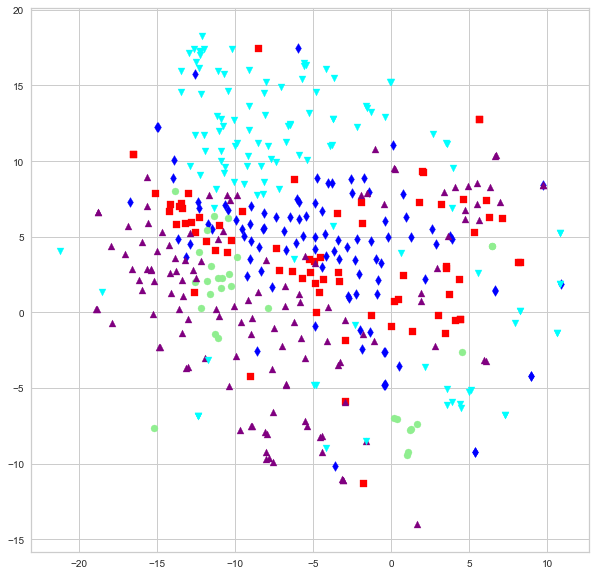

In [11]:
for elem in X_2D:
    idx = np.where(X_2D == elem)[0][0]
    classe = labels[idx]
    mIdx = color_keys.index(classe)
    plt.rcParams["figure.figsize"] = [10,10]
    plt.scatter(x=elem[0],y=elem[1], c=color_map[classe], marker=markers[mIdx], label=mIdx)

In [16]:
from bokeh.io import output_notebook
from bokeh.plotting import show, figure

# Configure the notebook to generate graph in a cell
# Always call this method before any visualization
output_notebook()

Loading BokehJS ...

In [17]:
df = pd.DataFrame(X_2D, columns=['x','y'])
df['book'] = target
df.head(10)

,x,y,book
0,1.308952,-1.210044,books
1,3.683610,1.197744,books
2,4.102567,-0.491403,books
3,-4.362008,2.223209,books
4,-1.797606,-11.246559,books
5,-15.132908,7.890898,books
6,-10.540944,3.984932,books
7,-7.219969,2.823558,books
8,0.010827,-0.878855,books
9,-10.298955,4.761555,books


In [18]:
color=['red', 'cornflowerblue', 'green', 'magenta', 'navy']
plot = figure(plot_width=800, plot_height=800)
_ = plot.text(x=df.x, y=df.y, text=df.book)
show(plot)